This is A project intend to predict the price of a Cryptocurrency both using ML and DL and compare the result of both method. In ML I have used Linear Regression and in DL I have used LSTM


In [3]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [4]:
maindf=pd.read_csv('/content/sample_data/BTC-USD.csv')

In [5]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  1828
Total number of fields present in the dataset:  7


In [6]:
maindf.shape

(1828, 7)

In [7]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-27,5279.471191,5310.750000,5233.635742,5268.291016,5268.291016,13111274675
1,2019-04-28,5271.746582,5326.231934,5255.683594,5285.139160,5285.139160,12819992056
2,2019-04-29,5284.858398,5311.274902,5216.487793,5247.352539,5247.352539,13735490672
3,2019-04-30,5247.726074,5363.257324,5224.189941,5350.726563,5350.726563,13878964574
4,2019-05-01,5350.914551,5418.003906,5347.645996,5402.697266,5402.697266,13679528236


In [8]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1828 non-null   object 
 1   Open       1828 non-null   float64
 2   High       1828 non-null   float64
 3   Low        1828 non-null   float64
 4   Close      1828 non-null   float64
 5   Adj Close  1828 non-null   float64
 6   Volume     1828 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.1+ KB


In [9]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1.828000e+03
mean,27922.629564,28559.462915,27243.217300,27951.955143,27951.955143,3.063834e+10
std,17126.304243,17557.416706,16631.442606,17134.308356,17134.308356,1.788761e+10
min,5002.578125,5310.750000,4106.980957,4970.788086,4970.788086,5.331173e+09
25%,10838.311524,11051.740479,10622.260986,10852.688477,10852.688477,1.872076e+10
50%,26147.213868,26522.880860,25803.703125,26175.978515,26175.978515,2.688945e+10
75%,40837.598633,42067.803711,39712.824219,40890.010742,40890.010742,3.774678e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,3.509679e+11


# **Checking for Null Values**

In [10]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [11]:
print('NA values:',maindf.isnull().values.any())
if maindf.isnull().values.any():
  maindf=maindf.dropna()

NA values: False


# **EDA(Exploratory Data Analysis)**

In [12]:
sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2019-04-27
Ending Date 2024-04-27


<ipython-input-12-d806aeb276ac>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sd=maindf.iloc[0][0]
<ipython-input-12-d806aeb276ac>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ed=maindf.iloc[-1][0]


In [13]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')
maindf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-27,5279.471191,5310.750000,5233.635742,5268.291016,5268.291016,13111274675
1,2019-04-28,5271.746582,5326.231934,5255.683594,5285.139160,5285.139160,12819992056
2,2019-04-29,5284.858398,5311.274902,5216.487793,5247.352539,5247.352539,13735490672
3,2019-04-30,5247.726074,5363.257324,5224.189941,5350.726563,5350.726563,13878964574
4,2019-05-01,5350.914551,5418.003906,5347.645996,5402.697266,5402.697266,13679528236
...,...,...,...,...,...,...,...
1823,2024-04-23,66839.890625,67199.242188,65864.867188,66407.273438,66407.273438,24310975583
1824,2024-04-24,66408.718750,67075.367188,63589.871094,64276.898438,64276.898438,30276655120
1825,2024-04-25,64275.019531,65275.207031,62783.632813,64481.707031,64481.707031,32155786816
1826,2024-04-26,64485.371094,64789.656250,63322.398438,63755.320313,63755.320313,24139372950


In [14]:
y_overall = maindf.loc[(maindf['Date'] >= sd)
                     & (maindf['Date'] <= ed)]
y_overall.drop(columns = ['Adj Close','Volume'],axis=1)

,Date,Open,High,Low,Close
0,2019-04-27,5279.471191,5310.750000,5233.635742,5268.291016
1,2019-04-28,5271.746582,5326.231934,5255.683594,5285.139160
2,2019-04-29,5284.858398,5311.274902,5216.487793,5247.352539
3,2019-04-30,5247.726074,5363.257324,5224.189941,5350.726563
4,2019-05-01,5350.914551,5418.003906,5347.645996,5402.697266
...,...,...,...,...,...
1823,2024-04-23,66839.890625,67199.242188,65864.867188,66407.273438
1824,2024-04-24,66408.718750,67075.367188,63589.871094,64276.898438
1825,2024-04-25,64275.019531,65275.207031,62783.632813,64481.707031
1826,2024-04-26,64485.371094,64789.656250,63322.398438,63755.320313


In [15]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,29458.772052,29487.134539
February,33671.230455,33916.660143
March,39139.085286,39330.920498
April,38844.533472,38750.388109
May,24602.446469,24444.308981
June,21439.017901,21379.433200
July,21193.760597,21260.186694
August,23648.917169,23644.744878
September,22536.464658,22505.006367


In [16]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


# **Building LSTM Model**

In [17]:
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1828, 2)


In [18]:
sd = pd.to_datetime(sd)
ed = pd.to_datetime(ed)

In [19]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text=f'Whole period of timeframe of Crypto close price {sd.strftime("%Y-%m-%d")} to {ed.strftime("%Y-%m-%d")}', plot_bgcolor='white',
                  font_size=12, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [20]:
last_year_to_past_2_year = ed - pd.offsets.DateOffset(months=12)
print(type(last_year_to_past_2_year))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [21]:
closedf = closedf[closedf['Date'] > last_year_to_past_2_year]
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  366


In [22]:
closedf

,Date,Close
1462,2023-04-28,29340.261719
1463,2023-04-29,29248.488281
1464,2023-04-30,29268.806641
1465,2023-05-01,28091.568359
1466,2023-05-02,28680.537109
...,...,...
1823,2024-04-23,66407.273438
1824,2024-04-24,64276.898438
1825,2024-04-25,64481.707031
1826,2024-04-26,63755.320313


In [23]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Crypto close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [24]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(366, 1)


In [25]:
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (219, 1)
test_data:  (147, 1)


In [26]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [27]:
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (158, 60)
y_train:  (158,)
X_test:  (86, 60)
y_test (86,)


In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (158, 60, 1)
X_test:  (86, 60, 1)


## Actuall Model Building

In [29]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [30]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0159 - val_loss: 0.6329
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0170 - val_loss: 0.6000
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0129 - val_loss: 0.5610
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0121 - val_loss: 0.5209
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0094 - val_loss: 0.4820
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0074 - val_loss: 0.4434
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0055 - val_loss: 0.4038
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0051 - val_loss: 0.3607
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0045 - val_loss: 0.3246
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0048 - val_loss: 0.2988
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0046 - val_loss: 0.2823
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0042 - val_lo

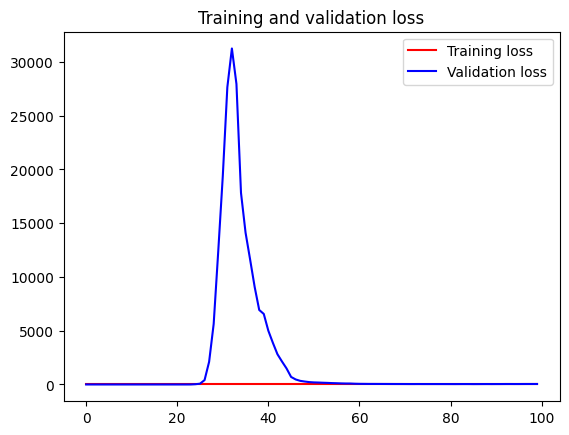

<Figure size 640x480 with 0 Axes>

In [31]:
### Plotting Loss vs Validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


((158, 1), (86, 1))

In [33]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [34]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  967.6193251874951
Train data MSE:  936287.1584763032
Train data MAE:  636.0079113916139
-------------------------------------------------------------------------------------
Test data RMSE:  323127.41818694654
Test data MSE:  104411328384.16183
Test data MAE:  182665.31408961923


In [35]:
## Variance Regression Score
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.936319435003167
Test data explained variance regression score: -876.9650837602387


In [36]:
## R square score for regression
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9362392566443424
Test data R2 score: -1287.993822756874


In [37]:
#MAE Score
mae_train = mean_absolute_error(original_ytrain, train_predict)
mae_test = mean_absolute_error(original_ytest, test_predict)
print("Train data MAE score:", mae_train)
print("Test data MAE score:", mae_test)

Train data MAE score: 636.0079113916139
Test data MAE score: 182665.31408961923


In [38]:
train_range = max(original_ytrain) - min(original_ytrain)
test_range = max(original_ytest) - min(original_ytest)
accuracy_train = 1 - (mae_train / train_range)
accuracy_test = 1 - (mae_test / test_range)
print('Train Accuracy',accuracy_train[0])
print('Test Accuracy',accuracy_test[0])

Train Accuracy 0.9529791947834176
Test Accuracy -4.9890427992389865


In [39]:
alg_models = pd.DataFrame({
    'model':['RMSE','MSE','MAE',"Accuracy"],
    'Training ':[math.sqrt(mean_squared_error(original_ytrain,train_predict)),
                        mean_squared_error(original_ytrain,train_predict),
                        mean_absolute_error(original_ytrain,train_predict),
                         accuracy_train[0]],
    'Test':[math.sqrt(mean_squared_error(original_ytest,test_predict)),
                     mean_squared_error(original_ytest,test_predict),
                      mean_absolute_error(original_ytest,test_predict),
                     accuracy_test[0]]
})

In [40]:
alg_models.sort_values(by='Test',ascending=False).style.background_gradient(
        cmap='coolwarm')

,model,Training,Test
1,MSE,936287.158476,104411328384.161835
0,RMSE,967.619325,323127.418187
2,MAE,636.007911,182665.314090
3,Accuracy,0.952979,-4.989043


In [41]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (366, 1)
Test predicted data:  (366, 1)


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [42]:
###################### ML ########################

In [43]:
#Creation of a variable for predicting '5' days out into the future
projection_range = 5
#creation of a new column with a name prediction
maindf['Prediction'] = maindf[['Close']].shift(-projection_range)
maindf

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,2019-04-27,5279.471191,5310.750000,5233.635742,5268.291016,5268.291016,13111274675,5505.283691
1,2019-04-28,5271.746582,5326.231934,5255.683594,5285.139160,5285.139160,12819992056,5768.289551
2,2019-04-29,5284.858398,5311.274902,5216.487793,5247.352539,5247.352539,13735490672,5831.167480
3,2019-04-30,5247.726074,5363.257324,5224.189941,5350.726563,5350.726563,13878964574,5795.708496
4,2019-05-01,5350.914551,5418.003906,5347.645996,5402.697266,5402.697266,13679528236,5746.807129
...,...,...,...,...,...,...,...,...
1823,2024-04-23,66839.890625,67199.242188,65864.867188,66407.273438,66407.273438,24310975583,NaN
1824,2024-04-24,66408.718750,67075.367188,63589.871094,64276.898438,64276.898438,30276655120,NaN
1825,2024-04-25,64275.019531,65275.207031,62783.632813,64481.707031,64481.707031,32155786816,NaN
1826,2024-04-26,64485.371094,64789.656250,63322.398438,63755.320313,63755.320313,24139372950,NaN


In [44]:
visualize_maindf = cycle(['Open','Close','High','Low','Prediction'])

fig = px.line(maindf, x=maindf.Date, y=[maindf['Open'], maindf['Close'],
                                          maindf['High'], maindf['Low'],maindf['Prediction']],
             labels={'Date': 'Date','value':'Price'})
fig.update_layout(title_text='Crypto', font_size=15, font_color='black',legend_title_text='Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(visualize_maindf)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [45]:
X_data = np.array(maindf[['Close']])
X_data = X_data[:-projection_range]
print(X_data)

[[ 5268.291016]
 [ 5285.13916 ]
 [ 5247.352539]
 ...
 [64994.441406]
 [64926.644531]
 [66837.679688]]


In [46]:
#creation of the dependent data set (y)
y_data = maindf['Prediction'].values
y_data = y_data[:-projection_range]
print(y_data)

[ 5505.283691  5768.289551  5831.16748  ... 64481.707031 63755.320313
 62973.277344]


In [47]:
################################################### Crypto #############################################################
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(X_data,y_data,test_size=0.40)

In [48]:
################################################### LinearRegression #############################################################
linReg_data = LinearRegression()
linReg_data.fit(x_train_data,y_train_data)

LinearRegression()

In [49]:
################################################### Monero #############################################################
linReg_confidence_train_data = linReg_data.score(x_train_data,y_train_data)
linReg_confidence_data = linReg_data.score(x_test_data,y_test_data)
print("Linear Regression Confidence score: ",linReg_confidence_data)
print(linReg_confidence_data*100,'%')

Linear Regression Confidence score:  0.9757073795554155
97.57073795554156 %


In [50]:
y_train_pred = linReg_data.predict(x_train_data)
y_test_pred = linReg_data.predict(x_test_data)

In [51]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(x_train_data,y_train_pred)))
print("Train data MSE: ", mean_squared_error(x_train_data,y_train_pred))
print("Train data MAE: ", mean_absolute_error(x_train_data,y_train_pred))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(x_test_data,y_test_pred)))
print("Test data MSE: ", mean_squared_error(x_test_data,y_test_pred))
print("Test data MAE: ", mean_absolute_error(x_test_data,y_test_pred))

Train data RMSE:  221.56717174174872
Train data MSE:  49092.01159363757
Train data MAE:  213.42475645562516
-------------------------------------------------------------------------------------
Test data RMSE:  218.2620934206506
Test data MSE:  47638.34142436481
Test data MAE:  209.15771904857448


In [52]:
## R square score for regression
print("Train data R2 score:", r2_score(x_train_data, y_train_pred))
print("Test data R2 score:", r2_score(x_test_data, y_test_pred))

Train data R2 score: 0.9998241682605638
Test data R2 score: 0.999844699531107


In [53]:
alg_models = pd.DataFrame({
    'model':['RMSE','MSE','MAE',"Accuracy"],
    'Training ':[math.sqrt(mean_squared_error(x_train_data,y_train_pred)),
                         mean_squared_error(x_train_data,y_train_pred),
                         mean_absolute_error(x_train_data,y_train_pred),
                         linReg_confidence_train_data],
    'Test':[math.sqrt(mean_squared_error(x_test_data,y_test_pred)),
                     mean_squared_error(x_test_data,y_test_pred),
                     mean_absolute_error(x_test_data,y_test_pred),
                     linReg_confidence_data]
})

In [54]:
alg_models.sort_values(by='Test',ascending=False).style.background_gradient(
        cmap='coolwarm')

,model,Training,Test
1,MSE,49092.011594,47638.341424
0,RMSE,221.567172,218.262093
2,MAE,213.424756,209.157719
3,Accuracy,0.980496,0.975707
